In [1]:
import rospy
from turtlesim.msg import Pose
from geometry_msgs.msg import Twist
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
x_plot = []
y_plot = []
pub = rospy.Publisher("turtle1/cmd_vel", Twist, queue_size=1)

In [2]:
def plot(x_plot,y_plot):
    np_x_plot = np.array(x_plot)
    np_y_plot = np.array(y_plot)
    ax.plot(np_x_plot,np_y_plot)

In [3]:
def turtleCallback(msg):
    global x_plot, y_plot
    x_plot.append(msg.x)
    y_plot.append(msg.y)
    vel = Twist()
    if (msg.x > 9.0):
        vel.linear.x = 1.0
        vel.angular.z = 1.0
    elif (msg.x < 1.5):
        vel.linear.x = 1.0
        vel.angular.z = -1.0
    else:
        vel.linear.x = 1.0
        vel.angular.z = 0.0
    pub.publish(vel)
    #plot(x_plot,y_plot)

In [4]:
%matplotlib widget
rospy.init_node("controller")
sub = rospy.Subscriber("turtle1/pose",Pose,turtleCallback)
time.sleep(10)
sub.unregister()
vel = Twist()
vel.linear.x = 0.0
vel.angular.z = 0.0
pub.publish(vel)

Text(0, 0.5, 'y')

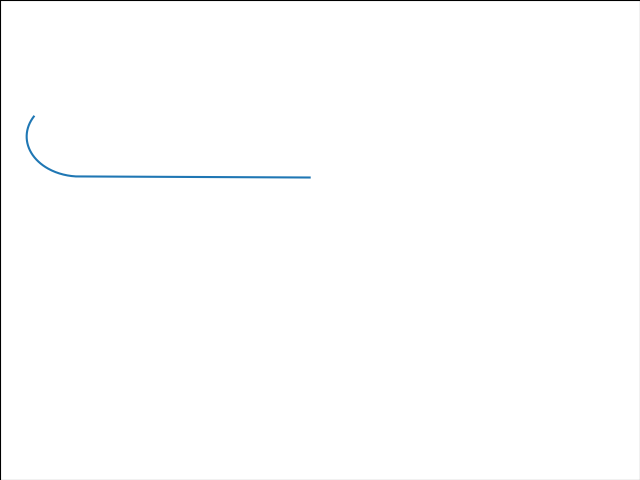

In [5]:
np_x_plot = np.array(x_plot)
np_y_plot = np.array(y_plot)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.plot(np_x_plot,np_y_plot)
ax.set_title("my_turtle")
ax.set_xlabel("x")
ax.set_ylabel("y")


In [12]:
import ipywidgets as widgets

w=widgets.IntSlider()
display(w)



In [14]:
w.value=30